# CA0 - AI
## Mahsa Massoud  - 810098032


In this project we learn how to preprocess data ( in .csv form) and fill its defects with appropriate values. Moreover, we predict price of cars with the help of statistical approaches.
Necessary librarie like panda, numpy , time and warnings( in order to hide potential warnings) has been included.

In [58]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

## 1.

The dataset has been given to us from the question and its columns consist of information of a specific car like its mode, width and so on. On the following sections we will split the test part from the dataset and the remaining will be our train set.

In [59]:
df = pd.read_csv('car_price_dataset.csv')

df is a shortform of DataFrame due to the fact that we read our csv file with the help of pandas library.df.head() gives the first 5 rows of dataset and df.tail() do it from the end.

In [60]:
df.head()

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,gas,168.8,64.1,48.8,2548,four,130.0,111.0,21,27,13495.0
1,2,alfa-romero stelvio,gas,168.8,64.1,48.8,2548,four,130.0,111.0,21,27,16500.0
2,3,alfa-romero Quadrifoglio,gas,171.2,65.5,52.4,2823,six,152.0,154.0,19,26,16500.0
3,4,audi 100 ls,gas,176.6,66.2,54.3,2337,four,109.0,NaN,24,30,13950.0
4,5,audi 100ls,gas,176.6,66.4,54.3,2824,five,136.0,115.0,18,22,NaN


In [61]:
df.tail()

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
200,201,volvo 145e (sw),gas,188.8,68.9,55.5,2952,four,141.0,114.0,23,28,16845.0
201,202,volvo 144ea,gas,188.8,68.8,55.5,3049,four,141.0,160.0,19,25,19045.0
202,203,volvo 244dl,gas,188.8,68.9,55.5,3012,six,173.0,134.0,18,23,21485.0
203,204,volvo 246,diesel,188.8,68.9,55.5,3217,six,145.0,106.0,26,27,22470.0
204,205,volvo 264gl,gas,188.8,68.9,55.5,3062,four,141.0,114.0,19,25,22625.0


df.describe() contains a more statistical form of data and brings about features like standard deviation, mean, min , max and ... for every coulmn.

In [62]:
df.describe()

,car_ID,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,191.000000,182.000000,205.000000,205.000000,185.000000
mean,103.000000,174.049268,65.907805,53.724878,2555.565854,125.418848,105.747253,25.219512,30.751220,13392.181984
std,59.322565,12.337289,2.145204,2.443522,520.680204,39.229587,40.288214,6.542142,6.886443,8235.838288
min,1.000000,141.100000,60.300000,47.800000,1488.000000,61.000000,52.000000,13.000000,16.000000,5118.000000
25%,52.000000,166.300000,64.100000,52.000000,2145.000000,97.000000,72.250000,19.000000,25.000000,7788.000000
50%,103.000000,173.200000,65.500000,54.100000,2414.000000,119.000000,95.000000,24.000000,30.000000,10295.000000
75%,154.000000,183.100000,66.900000,55.500000,2935.000000,141.000000,121.000000,30.000000,34.000000,16503.000000
max,205.000000,208.100000,72.300000,59.800000,4066.000000,326.000000,288.000000,49.000000,54.000000,45400.000000


## 2.

df.info() gives us the type of every coulms. int64 and folat64 shows categorical datas and object type illustrates non-categorical type of data , which needs to be handle in the following.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_ID          205 non-null    int64  
 1   CarName         205 non-null    object 
 2   fueltype        205 non-null    object 
 3   carlength       205 non-null    float64
 4   carwidth        205 non-null    float64
 5   carheight       205 non-null    float64
 6   curbweight      205 non-null    int64  
 7   cylindernumber  205 non-null    object 
 8   enginesize      191 non-null    float64
 9   horsepower      182 non-null    float64
 10  citympg         205 non-null    int64  
 11  highwaympg      205 non-null    int64  
 12  price           185 non-null    float64
dtypes: float64(6), int64(4), object(3)
memory usage: 20.9+ KB


obj_df is the datafrom in which object forms are separated. As we can see, three columns of CarName, fueltype and cylindernumber are non-categorical.


In [64]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,CarName,fueltype,cylindernumber
0,alfa-romero giulia,gas,four
1,alfa-romero stelvio,gas,four
2,alfa-romero Quadrifoglio,gas,six
3,audi 100 ls,gas,four
4,audi 100ls,gas,five


In [65]:
obj_df["CarName"].value_counts()


peugeot 504                 6
toyota corona               6
toyota corolla              6
subaru dl                   4
mitsubishi mirage g4        3
                           ..
toyota corona mark ii       1
porsche boxter              1
mitsubishi lancer           1
mazda glc custom l          1
buick electra 225 custom    1
Name: CarName, Length: 147, dtype: int64

In [66]:
obj_df["cylindernumber"].value_counts()


four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

An approach to categorize non-categorical data is Label Encoding.
This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ type. So we have to change type to ‘category’ before using this approach.
Then we can assign the encoded variable to a new column using the cat.codes accessor.The nice aspect of this approach is that we get the benefits of pandas categories (compact data size, ability to order, plotting support) but can easily be converted to numeric values for further analysis.

In [67]:
obj_df["cylindernumber"] = obj_df["cylindernumber"].astype('category')
obj_df.dtypes

CarName             object
fueltype            object
cylindernumber    category
dtype: object

In [68]:
obj_df["cylindernumber_cat"] = obj_df["cylindernumber"].cat.codes
obj_df.head()

,CarName,fueltype,cylindernumber,cylindernumber_cat
0,alfa-romero giulia,gas,four,2
1,alfa-romero stelvio,gas,four,2
2,alfa-romero Quadrifoglio,gas,six,3
3,audi 100 ls,gas,four,2
4,audi 100ls,gas,five,1


In [69]:
obj_df["fueltype"] = obj_df["fueltype"].astype('category')
obj_df["fueltype_cat"] = obj_df["fueltype"].cat.codes
obj_df.head()


,CarName,fueltype,cylindernumber,cylindernumber_cat,fueltype_cat
0,alfa-romero giulia,gas,four,2,1
1,alfa-romero stelvio,gas,four,2,1
2,alfa-romero Quadrifoglio,gas,six,3,1
3,audi 100 ls,gas,four,2,1
4,audi 100ls,gas,five,1,1


In [70]:
obj_df["CarName"] = obj_df["CarName"].astype('category')
obj_df["CarName_cat"] = obj_df["CarName"].cat.codes
obj_df.head()


,CarName,fueltype,cylindernumber,cylindernumber_cat,fueltype_cat,CarName_cat
0,alfa-romero giulia,gas,four,2,1,2
1,alfa-romero stelvio,gas,four,2,1,3
2,alfa-romero Quadrifoglio,gas,six,3,1,1
3,audi 100 ls,gas,four,2,1,4
4,audi 100ls,gas,five,1,1,5


In [71]:
df_numeric = df.select_dtypes([np.number])
df_numeric["CarName_cat"] = obj_df["CarName_cat"]
df_numeric["cylindernumber_cat"] = obj_df["cylindernumber_cat"]
df_numeric["fueltype_cat"] = obj_df["fueltype_cat"]
df_numeric

,car_ID,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,price,CarName_cat,cylindernumber_cat,fueltype_cat
0,1,168.8,64.1,48.8,2548,130.0,111.0,21,27,13495.0,2,2,1
1,2,168.8,64.1,48.8,2548,130.0,111.0,21,27,16500.0,3,2,1
2,3,171.2,65.5,52.4,2823,152.0,154.0,19,26,16500.0,1,3,1
3,4,176.6,66.2,54.3,2337,109.0,NaN,24,30,13950.0,4,2,1
4,5,176.6,66.4,54.3,2824,136.0,115.0,18,22,NaN,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,188.8,68.9,55.5,2952,141.0,114.0,23,28,16845.0,139,2,1
201,202,188.8,68.8,55.5,3049,141.0,160.0,19,25,19045.0,138,2,1
202,203,188.8,68.9,55.5,3012,173.0,134.0,18,23,21485.0,140,3,1
203,204,188.8,68.9,55.5,3217,145.0,106.0,26,27,22470.0,142,3,0


Inorder to label the categorical colums , we made a dictionary and by using .replce() method, we replace numeric values instead of objects. CarName column remains unchanged

In [72]:
cleanup_nums = {"fueltype":     {"gas": 0, "diesel": 1},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [73]:
df = df.replace(cleanup_nums)
df.head()

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,0,168.8,64.1,48.8,2548,4,130.0,111.0,21,27,13495.0
1,2,alfa-romero stelvio,0,168.8,64.1,48.8,2548,4,130.0,111.0,21,27,16500.0
2,3,alfa-romero Quadrifoglio,0,171.2,65.5,52.4,2823,6,152.0,154.0,19,26,16500.0
3,4,audi 100 ls,0,176.6,66.2,54.3,2337,4,109.0,NaN,24,30,13950.0
4,5,audi 100ls,0,176.6,66.4,54.3,2824,5,136.0,115.0,18,22,NaN


## 3.
we want to see how many NAN values for each column we have.

In [74]:
df.isnull().sum()

car_ID             0
CarName            0
fueltype           0
carlength          0
carwidth           0
carheight          0
curbweight         0
cylindernumber     0
enginesize        14
horsepower        23
citympg            0
highwaympg         0
price             20
dtype: int64

For two columns of 'enginesize' and 'horsepower' we have NAN values and we fill them with the coulmn's mean.

Benefits:
1. Easy to implement(Robust to outliers)
2. A faster way to obtain the complete dataset
3. A good representation of the whole column 
Disadvantages:
1. Change or Distortion in the original variance
2. Impacts Correlation
3. In binary or discrete values it does not represent something maeningful

In [75]:
df['enginesize'] = df['enginesize'].fillna((df['enginesize'].mean()))
print(df['enginesize'].isna().sum())

0


In [76]:
df['horsepower'] = df['horsepower'].fillna((df['horsepower'].mean()))
df['horsepower'] = df['horsepower'].fillna((df['horsepower'].mean()))
df.head()

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,0,168.8,64.1,48.8,2548,4,130.0,111.000000,21,27,13495.0
1,2,alfa-romero stelvio,0,168.8,64.1,48.8,2548,4,130.0,111.000000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,0,171.2,65.5,52.4,2823,6,152.0,154.000000,19,26,16500.0
3,4,audi 100 ls,0,176.6,66.2,54.3,2337,4,109.0,105.747253,24,30,13950.0
4,5,audi 100ls,0,176.6,66.4,54.3,2824,5,136.0,115.000000,18,22,NaN


In [77]:
df.isnull().sum()

car_ID             0
CarName            0
fueltype           0
carlength          0
carwidth           0
carheight          0
curbweight         0
cylindernumber     0
enginesize         0
horsepower         0
citympg            0
highwaympg         0
price             20
dtype: int64

test_df is a datafram for rows in them price value is NAN and this dataframe will be used in the last part of teh project(prediction)

In [78]:
test_df = df[df['price'].isnull()]

test_df

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
4,5,audi 100ls,0,176.6,66.4,54.3,2824,5,136.000000,115.0,18,22,NaN
29,30,dodge coronet custom (sw),0,173.2,66.3,50.2,2811,4,156.000000,145.0,19,24,NaN
31,32,honda civic cvcc,0,144.6,63.9,50.8,1819,4,92.000000,76.0,31,38,NaN
52,53,mazda rx2 coupe,0,159.1,64.2,54.1,1905,4,91.000000,68.0,31,38,NaN
53,54,mazda rx-4,0,166.8,64.2,54.1,1945,4,91.000000,68.0,31,38,NaN
59,60,mazda 626,0,177.8,66.5,53.7,2385,4,122.000000,84.0,26,32,NaN
62,63,mazda rx-4,0,177.8,66.5,55.5,2410,4,122.000000,84.0,26,32,NaN
67,68,buick electra 225 custom,1,190.9,70.3,56.5,3515,5,183.000000,123.0,22,25,NaN
78,79,mitsubishi outlander,0,157.3,64.4,50.8,2004,4,92.000000,68.0,31,38,NaN
84,85,mitsubishi mirage g4,0,173.2,66.3,50.2,2926,4,156.000000,145.0,19,24,NaN


Now we eliminate row with NAN value in their price, from the main dataframe.

## 4.

In [79]:
df = df.dropna(subset = ['price'])
df['cylindernumber'].value_counts()

4     143
6      22
5       9
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

The number of cars rows for each cylindernumber value has been shown above.

## 5.

In [80]:
df[(df['fueltype'] == 0) & (df['horsepower'] > 100) & (df['citympg'] < 15)]


,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
49,50,jaguar xk,0,191.7,70.6,47.8,3950,12,326.000000,262.000000,13,17,36000.0
73,74,buick century special,0,208.1,71.7,56.7,3900,8,125.418848,105.747253,14,16,40960.0
74,75,buick regal sport coupe (turbo),0,199.2,72.0,55.4,3715,8,304.000000,184.000000,14,16,45400.0


We can see there are only three rows wich their fuletype is gas and horsepower>100 and citympg<15. 

## 6 and 7.

In [81]:
tic = time.time()
print("price avg of gas type", df[(df['fueltype'] == 0)]['price'].mean())
toc = time.time()

print("msec :", 1000*(toc - tic))

price avg of gas type 13170.738957831325
msec : 2.223491668701172


Time of calculatin for gas type:
Now we can observe that thanks to the vectorization method, the time of calculation has been decreased more than 23 times(compared with classic methods such as using for loops)

In [82]:
cnt= 0 
Sum = 0
tic = time.time()
for i, row in df.iterrows():
    if(row['fueltype'] == 0):
        cnt+=1
        Sum += row['price']
toc = time.time()
print('average  price of gas type cars non-vectorized:' , Sum/cnt)
print(" avg time non-vectorized msec:", 1000*(toc - tic))    

average  price of gas type cars non-vectorized: 13170.738957831325
 avg time non-vectorized msec: 56.04743957519531


In [83]:
tic = time.time()
print("price avg of diesel type", df[(df['fueltype'] == 1)]['price'].mean())
toc = time.time()

print("msec :", 1000*(toc - tic))

price avg of diesel type 15326.894736842105
msec : 3.0024051666259766


In [84]:
cnt= 0 
Sum = 0
tic = time.time()
for i, row in df.iterrows():
    if(row['fueltype'] == 1):
        cnt+=1
        Sum += row['price']
toc = time.time()
print('average  price of diesel type cars non-vectorized:' , Sum/cnt)
print(" avg time non-vectorized msec:", 1000*(toc - tic))    

average  price of diesel type cars non-vectorized: 15326.894736842105
 avg time non-vectorized msec: 46.95844650268555


Time of calculatin for diesel type:
Now we can observe that thanks to the vectorization method, the time of calculation has been decreased more than 10 times(compared with classic methods such as using for loops)

In [85]:
import matplotlib.pyplot as plt

## 8.
Drawing histograms for each column in dataframe can be done by using the hist method for DataFrame objects.This method has many attributes like color of bars which can has been set in this project. The histograms below, show the concentration of data in each range.

Text(0.5, 1.0, 'Car Length')

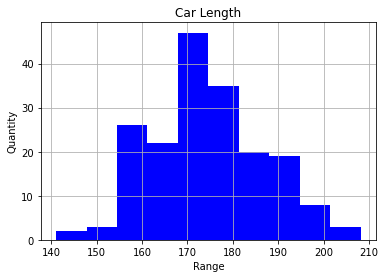

In [86]:
df['carlength'].hist(color = 'b')
plt.ylabel('Quantity')
plt.xlabel('Range')
plt.title('Car Length')

For example car length has an approximately normal form.

Text(0.5, 1.0, 'Car Width')

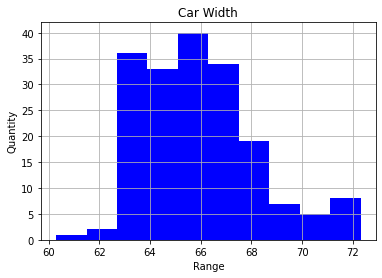

In [87]:
df['carwidth'].hist(color = 'b')
plt.ylabel('Quantity')
plt.xlabel('Range')
plt.title('Car Width')

Text(0.5, 1.0, 'Car Height')

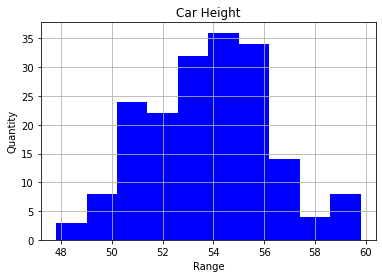

In [88]:
df['carheight'].hist(color = 'b')
plt.ylabel('Quantity')
plt.xlabel('Range')
plt.title('Car Height')

Text(0.5, 1.0, 'Engine Size')

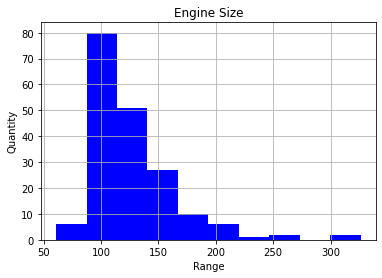

In [89]:
df['enginesize'].hist(color = 'b' )
plt.ylabel('Quantity')
plt.xlabel('Range')
plt.title('Engine Size')

Text(0.5, 1.0, 'Horse Power')

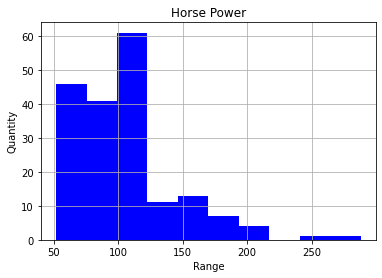

In [90]:
df['horsepower'].hist(color = 'b')
plt.ylabel('Quantity')
plt.xlabel('Range')
plt.title('Horse Power')

Text(0.5, 1.0, 'city (mpg)')

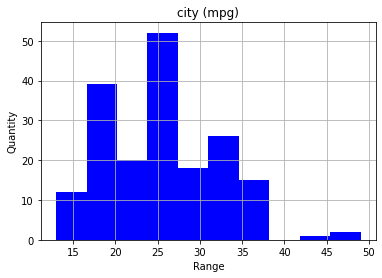

In [91]:
df['citympg'].hist(color = 'b' )
plt.ylabel('Quantity')
plt.xlabel('Range')
plt.title('city (mpg)')

Text(0.5, 1.0, 'Highway (mpg)')

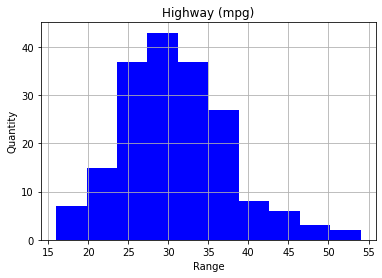

In [92]:
df['highwaympg'].hist(color = 'b' )

plt.ylabel('Quantity')
plt.xlabel('Range')
plt.title('Highway (mpg)')

Text(0.5, 1.0, 'Price')

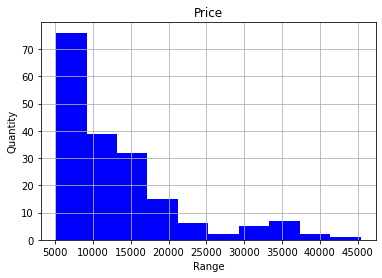

In [93]:
df['price'].hist(color = 'b' )

plt.ylabel('Quantity')
plt.xlabel('Range')
plt.title('Price')

The concentration of prices under 10000 dollars are much more than other ranges

In [94]:
old_mean = df['price'].mean()
old_mean

13392.181983783783

In [95]:
old_std = df['price'].std()
old_std

8235.83828810198

## 9.
Data normalization is the organization of data to appear similar across all records and fields.It increases the cohesion of entry types leading to cleansing, lead generation, segmentation, and higher quality data. In this scope we normilize the price values by subtracting them with the value of its mean and divide it to its standard deviation.
As you can see below all the values will be between 0 and 1.

In [96]:
df['price'] = (df['price'] - df['price'].mean()) /df['price'].std()
df

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,0,168.8,64.1,48.8,2548,4,130.0,111.000000,21,27,0.012484
1,2,alfa-romero stelvio,0,168.8,64.1,48.8,2548,4,130.0,111.000000,21,27,0.377353
2,3,alfa-romero Quadrifoglio,0,171.2,65.5,52.4,2823,6,152.0,154.000000,19,26,0.377353
3,4,audi 100 ls,0,176.6,66.2,54.3,2337,4,109.0,105.747253,24,30,0.067731
5,6,audi fox,0,177.3,66.3,53.1,2507,5,136.0,110.000000,19,25,0.225577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),0,188.8,68.9,55.5,2952,4,141.0,114.000000,23,28,0.419243
201,202,volvo 144ea,0,188.8,68.8,55.5,3049,4,141.0,160.000000,19,25,0.686368
202,203,volvo 244dl,0,188.8,68.9,55.5,3012,6,173.0,134.000000,18,23,0.982634
203,204,volvo 246,1,188.8,68.9,55.5,3217,6,145.0,106.000000,26,27,1.102234


## 10.
Now we can gain another visullization for correlation between price and every other column. Scater plot showsa type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

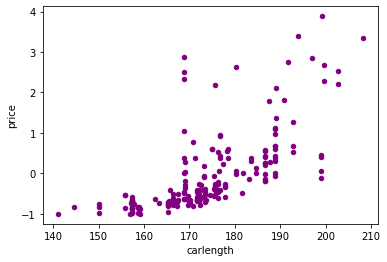

In [97]:
df.plot.scatter(x = "carlength", y = "price" , color = 'purple' )


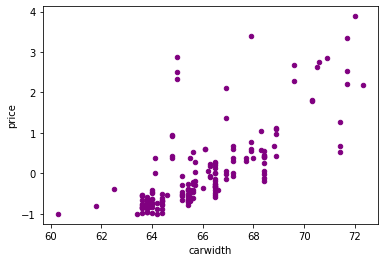

In [98]:
df.plot.scatter(x = "carwidth", y = "price" , color = 'purple' )

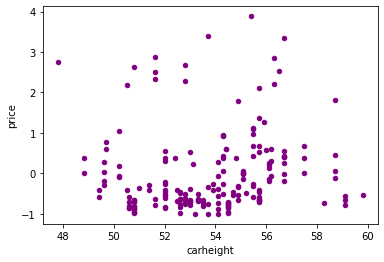

In [99]:
df.plot.scatter(x = "carheight", y = "price", color = 'purple' )

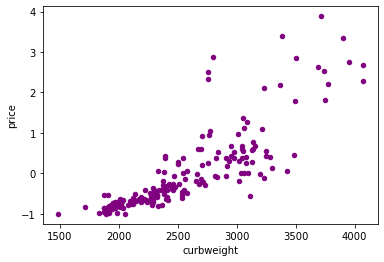

In [100]:
df.plot.scatter(x = "curbweight", y = "price", color = 'purple' )

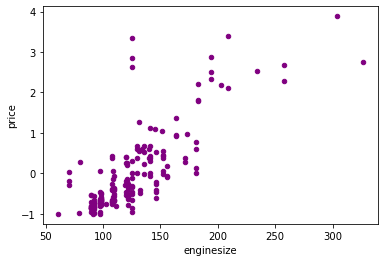

In [101]:
df.plot.scatter(x = "enginesize", y = "price", color = 'purple' )

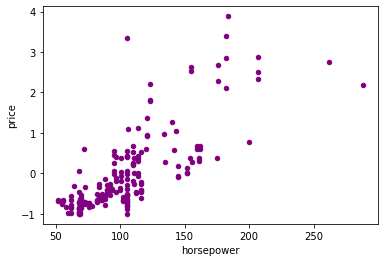

In [102]:
df.plot.scatter(x = "horsepower", y = "price", color = 'purple' )

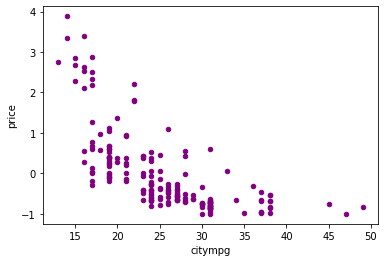

In [103]:
df.plot.scatter(x = "citympg", y = "price", color = 'purple' )

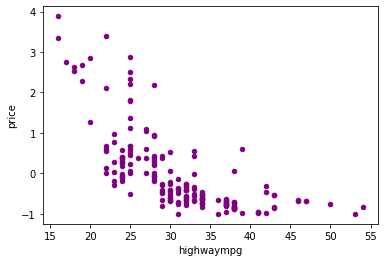

In [104]:
df.plot.scatter(x = "highwaympg", y = "price", color = 'purple' )

In [105]:
df = df.drop('cylindernumber' , axis =1)


In order to find the feature with the maximum correlation with price , we can call .corr() function on every numeric coulms and price column.
so as we can see( except price itself which its correlation by itself is obviously 1) , curbweight has the maximum correlation of 0.833602 so we choose this parameter.

In [106]:

df[df.columns[4:]].corr()['price'][:]

carwidth      0.755490
carheight     0.111783
curbweight    0.833602
enginesize    0.794026
horsepower    0.769182
citympg      -0.687151
highwaympg   -0.698832
price         1.000000
Name: price, dtype: float64

## 11.

new_df is the data frame in which curbweight and price are included.

In [107]:
new_df = df[['curbweight', 'price']]
new_df

,curbweight,price
0,2548,0.012484
1,2548,0.377353
2,2823,0.377353
3,2337,0.067731
5,2507,0.225577
...,...,...
200,2952,0.419243
201,3049,0.686368
202,3012,0.982634
203,3217,1.102234


## 12.

In [108]:
train = new_df['curbweight']
test = new_df['price']
new_df['bias'] = 1
X_augmented = np.vstack((new_df['bias'], train)).T
theta = np.linalg.pinv(X_augmented.T.dot(X_augmented)).dot(X_augmented.T).dot(test)


we can use normal equation inorder to estimate the value of prices:

We first add a new column bias as theta0 in our future matrix calculations. 

X is the input (train) which refers to 'curbwight' column and Yi is the price of Xi. so Here Y_hat =  theta1*X1+ theta0

![system schema](https://miro.medium.com/max/776/1*sbsAvcXV9TOmWFIRnCFt-Q.png)
![system schema](https://miro.medium.com/max/257/1*Lv9qHJf_Au33ikdAmB4x2Q.png)

![system schema](https://miro.medium.com/max/597/1*aj3OqspbpwQXrkTZPdOe8g.jpeg)



Here theta is a 2X1 vector which contains theta0 and theta1

In [109]:
theta

array([-4.03582012e+00,  1.57822508e-03])

In [119]:
from sklearn.metrics import mean_squared_error 
with_beta = new_df[['bias', 'curbweight']]
y_pred =  np.dot(with_beta , theta)
print("Mean Square Error is ", mean_squared_error(test,y_pred), 'Which is less than 0.5 and correct')

Mean Square Error is  0.3034577616137969 Which is less than 0.5 and correct


We have imported mean_square_function in order to calculate MSE for bias and curbwight.

![system schema](https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG)

## 13.

Text(0.5, 0, 'curb weight')

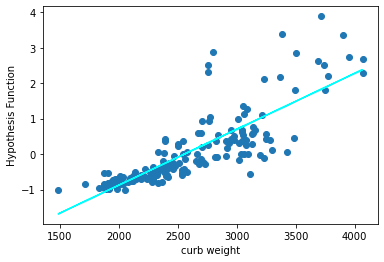

In [111]:
plt.scatter(train, test)
plt.plot(train, y_pred , color  = 'cyan')
plt.ylabel('Hypothesis Function')
plt.xlabel('curb weight')


The following plot indicates how the line  y=θ1*x+θ0 which corresponds to actual points of dataset

In [112]:
test_df.head()

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
4,5,audi 100ls,0,176.6,66.4,54.3,2824,5,136.0,115.0,18,22,NaN
29,30,dodge coronet custom (sw),0,173.2,66.3,50.2,2811,4,156.0,145.0,19,24,NaN
31,32,honda civic cvcc,0,144.6,63.9,50.8,1819,4,92.0,76.0,31,38,NaN
52,53,mazda rx2 coupe,0,159.1,64.2,54.1,1905,4,91.0,68.0,31,38,NaN
53,54,mazda rx-4,0,166.8,64.2,54.1,1945,4,91.0,68.0,31,38,NaN


In [113]:
df['price'].mean()

1.0202049415474412e-16

## 14.
Now we want to predict the value of prices for our test_df (NAN prices). So same formulas will be assigned here and also the prediction has been shown in both form of norma;ized and unnormalized form.

In [117]:
test_df['bias'] = 1
test_df['price'] = np.dot(test_df[['bias', 'curbweight']],theta)
test_df['price'] = test_df['price'] * old_std + old_mean
print("Unnormalized form of prediction of prices: ")
test_df


Unnormalized form of prediction of prices: 


,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price,bias
4,5,audi 100ls,0,176.6,66.4,54.3,2824,5,136.000000,115.0,18,22,16860.190654,1
29,30,dodge coronet custom (sw),0,173.2,66.3,50.2,2811,4,156.000000,145.0,19,24,16691.216568,1
31,32,honda civic cvcc,0,144.6,63.9,50.8,1819,4,92.000000,76.0,31,38,3797.194059,1
52,53,mazda rx2 coupe,0,159.1,64.2,54.1,1905,4,91.000000,68.0,31,38,4915.022623,1
53,54,mazda rx-4,0,166.8,64.2,54.1,1945,4,91.000000,68.0,31,38,5434.942885,1
59,60,mazda 626,0,177.8,66.5,53.7,2385,4,122.000000,84.0,26,32,11154.065773,1
62,63,mazda rx-4,0,177.8,66.5,55.5,2410,4,122.000000,84.0,26,32,11479.015937,1
67,68,buick electra 225 custom,1,190.9,70.3,56.5,3515,5,183.000000,123.0,22,25,25841.813188,1
78,79,mitsubishi outlander,0,157.3,64.4,50.8,2004,4,92.000000,68.0,31,38,6201.825273,1
84,85,mitsubishi mirage g4,0,173.2,66.3,50.2,2926,4,156.000000,145.0,19,24,18185.987323,1


In [116]:
test_df['bias'] = 1
test_df['price'] = np.dot(test_df[['bias', 'curbweight']],theta)
test_df['price'] = test_df['price']
print("Normalized form of prediction of prices: ")
test_df


Normalized form of prediction of prices: 


,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price,bias
4,5,audi 100ls,0,176.6,66.4,54.3,2824,5,136.000000,115.0,18,22,0.421088,1
29,30,dodge coronet custom (sw),0,173.2,66.3,50.2,2811,4,156.000000,145.0,19,24,0.400571,1
31,32,honda civic cvcc,0,144.6,63.9,50.8,1819,4,92.000000,76.0,31,38,-1.165029,1
52,53,mazda rx2 coupe,0,159.1,64.2,54.1,1905,4,91.000000,68.0,31,38,-1.029301,1
53,54,mazda rx-4,0,166.8,64.2,54.1,1945,4,91.000000,68.0,31,38,-0.966172,1
59,60,mazda 626,0,177.8,66.5,53.7,2385,4,122.000000,84.0,26,32,-0.271753,1
62,63,mazda rx-4,0,177.8,66.5,55.5,2410,4,122.000000,84.0,26,32,-0.232298,1
67,68,buick electra 225 custom,1,190.9,70.3,56.5,3515,5,183.000000,123.0,22,25,1.511641,1
78,79,mitsubishi outlander,0,157.3,64.4,50.8,2004,4,92.000000,68.0,31,38,-0.873057,1
84,85,mitsubishi mirage g4,0,173.2,66.3,50.2,2926,4,156.000000,145.0,19,24,0.582066,1


Resources :
    [1] https://pbpython.com/categorical-encoding.html
    
    [2] https://cdn-media-1.freecodecamp.org/
    
    [3]  https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57